<a href="https://colab.research.google.com/github/irvanfalasifa/Pembelajaran-mesin/blob/main/UTS_Mechine_Learning_1197050056_Irvan_Falasifa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UTS Pembelajaran Mesin
1197050056 Irvan Falasifa C

# **Topik Mini Riset**
Mini riset ini mengenai analisis Regresi untuk memprediksi harga akhir Laptop menggunakan 40 Algoritma Regressor Machine Learning

# **Business Understanding**
Tujuan dari penelitian ini adalah memprediksi harga untuk mengetahui laptop mana yang paling banyak diminati berdasarkan spesifikasi

# **Data Understanding**
Dataset ini merupakan harga dan peringkat dari jenis laptop terlaris. Kumpulan data yang memiliki 23 dimensi dan 896 catatan.
> ini rincian atribut/fitur/independent variable/kriteria:

1.  brand - string - Laptop Brand
2.  model - string - Laptop Model
3.  processor_brand - string - Processor Brand
4.  processor_name - string - Processor Name
5.  processor_gnrtn - string - Processor Generation
6.  ram_gb - string - RAM Capacity
7.  ram_type - string - RAM Type
8.  ssd - string - SSD Storage
9.  hdd - string - HDD Storage
10. os - string - Operating System
11. os_bit - string - bit of Operating System
12. graphic_card_gb - string - VRAM Capacity Graphic Card
13. weight - string - Laptop Weight
14. display_size - numeric - Display Size
15. warranty - string - Laptop Warranty
16. Touchscreen - string - Touchscreen type
17. msoffice - string - Microsoft Office
18. latest_price - numeric - latest price
19. old_price - numeric - old price
20. discount - string - discount
21. star_rating - string - star ratting
22. ratings - string - total ratting
23. reviews - string - total reviews

> ini variabel target/dependet variable/class/label

Diperuntukan bagi calon pembeli

# **Data Preparation**

In [ ]:
# Import Library yang akan dibutuhkan
import pandas as pd
import numpy as np
import tensorflow as tf
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# load data
url = 'https://raw.githubusercontent.com/irvanfalasifa/Pembelajaran-mesin/main/dataset/Cleaned_Laptop_data.csv'
df = pd.read_csv(url, sep=',')

df.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,...,Missing,0,No,No,24990,32790,23,3.7,63,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,19590,21325,8,3.6,1894,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,19990,27990,28,3.7,1153,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,...,Missing,0,No,No,21490,27990,23,3.7,1153,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,...,Missing,0,No,No,24990,33490,25,3.7,1657,234


In [ ]:
# menampilkan jumlah baris dan kolom
df.shape

(896, 23)

In [ ]:
# Menampilkan random sample
df.sample(2)

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
100,ASUS,Chromebook,Intel,Celeron Dual,Missing,4 GB GB,LPDDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,23490,29990,21,4.2,632,92
23,Avita,Cosmos,Intel,Celeron Dual,Missing,4 GB GB,DDR4,0 GB,512 GB,Windows,...,Missing,0,No,No,17490,23490,25,3.6,1120,196


In [ ]:
# Cek tidak ada null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    object 
 6   ram_type         896 non-null    object 
 7   ssd              896 non-null    object 
 8   hdd              896 non-null    object 
 9   os               896 non-null    object 
 10  os_bit           896 non-null    object 
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  Touchscreen      896 non-null    object 
 16  msoffice         896 non-null    object 
 17  latest_price    

In [ ]:
# data brand
df.brand.unique()

array(['Lenovo', 'Avita', 'HP', 'acer', 'ASUS', 'DELL', 'RedmiBook',
       'realme', 'Infinix', 'MSI', 'lenovo', 'MICROSOFT', 'Smartron',
       'LG', 'Nokia', 'APPLE', 'Vaio', 'Mi', 'ALIENWARE', 'iball',
       'SAMSUNG'], dtype=object)

In [ ]:
df['model'].value_counts().index

Index(['Missing', 'VivoBook', 'Inspiron', 'Pavilion', 'IdeaPad', 'Ryzen',
       'Vostro', 'Ideapad', 'ROG', 'MacBook',
       ...
       'Inpiron', 'GAMING', 'GS', '430', 'F17', 'B50-70', 'GE76', 'GP65',
       'GP76', 'Thinkpad'],
      dtype='object', length=117)

In [ ]:
# data ukuran layar
df.display_size.unique()

array(['Missing', '14', '15.6', '14.96', '15', '14.1', '12.2', '13.3',
       '17.3', '13', '16', '14.9', '16.1', '14.2', '16.2', '13.4'],
      dtype=object)

In [ ]:
df['display_size'].value_counts().index

Index(['Missing', '15.6', '16', '14', '13.3', '17.3', '14.96', '14.1', '13',
       '15', '14.2', '16.2', '12.2', '14.9', '16.1', '13.4'],
      dtype='object')

In [ ]:
# data processor / CPU
df.processor_name.unique()

array(['A6-9225 Processor', 'APU Dual', 'Athlon Dual', 'Core i3',
       'Core i5', 'Celeron Dual', 'Ryzen', 'Ryzen 5', 'Core', 'Core i7',
       'Core i9', 'Core m3', 'Dual Core', 'Ever Screenpad', 'GeForce GTX',
       'GeForce RTX', 'GEFORCE RTX', 'Hexa Core', 'M1', 'Genuine Windows',
       'Pentium Quad', 'Pentium Silver', 'Ryzen 3', 'MediaTek Kompanio',
       'Quad', 'Ryzen 7', 'Ryzen 9', 'Snapdragon 7c'], dtype=object)

In [ ]:
df['processor_brand'].value_counts().index

Index(['Intel', 'AMD', 'M1', 'MediaTek', 'Qualcomm'], dtype='object')

In [ ]:
# data RAM (GB)
df.ram_gb.unique()

array(['4 GB GB', '8 GB GB', '32 GB GB', '16 GB GB'], dtype=object)

In [ ]:
# data OS
df.os.unique()

array(['Windows', 'DOS', 'Mac'], dtype=object)

# Analisis Data

Menampilkan Brand yang diminati

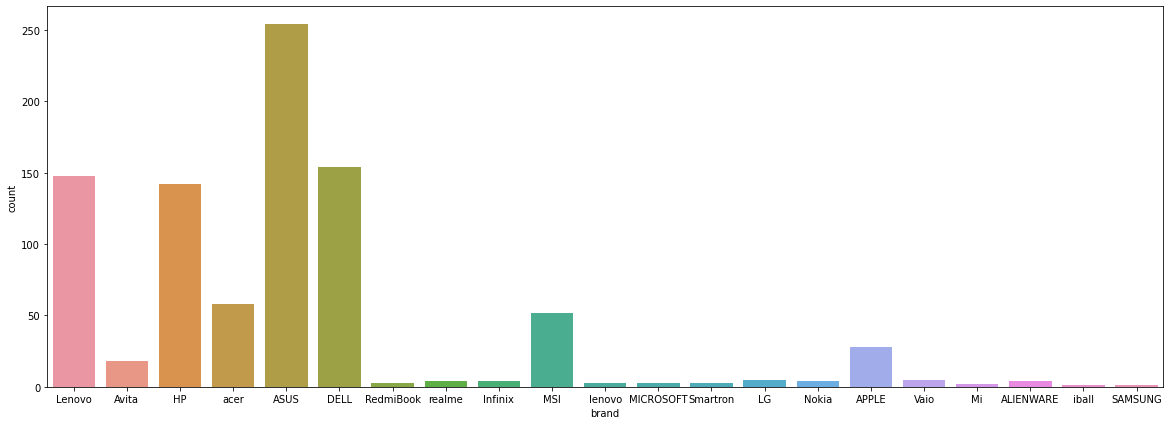

In [ ]:
plt.figure(figsize = (20,7))
sns.countplot(x = 'brand' , data = df)

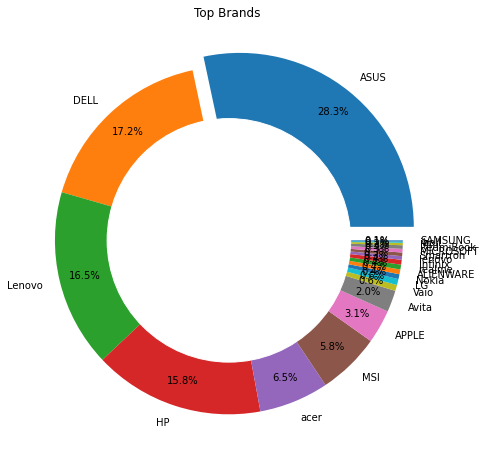

In [ ]:
data = df['brand'].value_counts().values.tolist()
labels = df['brand'].value_counts().index.tolist()
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0)
plt.figure(figsize=(8,8))
# membuat pieplot
plt.pie(data, labels=labels,autopct='%1.1f%%',pctdistance=0.85,explode=explode)
# menambahkan lubang agar terlihat seperti donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Top Brands ')
plt.show()

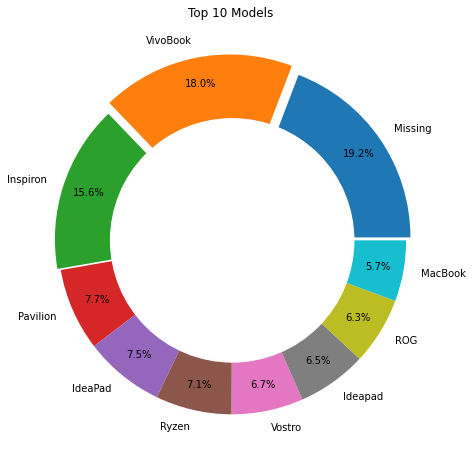

In [ ]:
# menampilkan brand yang diminati
data = (df['model'].value_counts()/df['model'].value_counts().sum()*100).head(10).values.tolist()
labels = (df['model'].value_counts()/df['model'].value_counts().sum()*100).head(10).index.tolist()
total = (df['model'].value_counts()/df['model'].value_counts().sum()*100).sum()
explode = (0.03,0.07 , 0.02, 0, 0, 0, 0, 0, 0, 0)
plt.figure(figsize=(8,8))
# Membuat pieplot
plt.pie(data, labels=labels,autopct=lambda x: '{:.1f}%'.format((x*total)/100),pctdistance=0.85,explode=explode)
# menambahkan lubang agar terlihat seperti donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Top 10 Models ')
plt.show()

In [ ]:
fig = px.treemap(df, path=[px.Constant("all"), 'brand', 'model', 'processor_name',
     'ram_gb', 'ssd', 'os',  'latest_price'], values='latest_price')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

Menampilkan Ukuran layar yang diminati

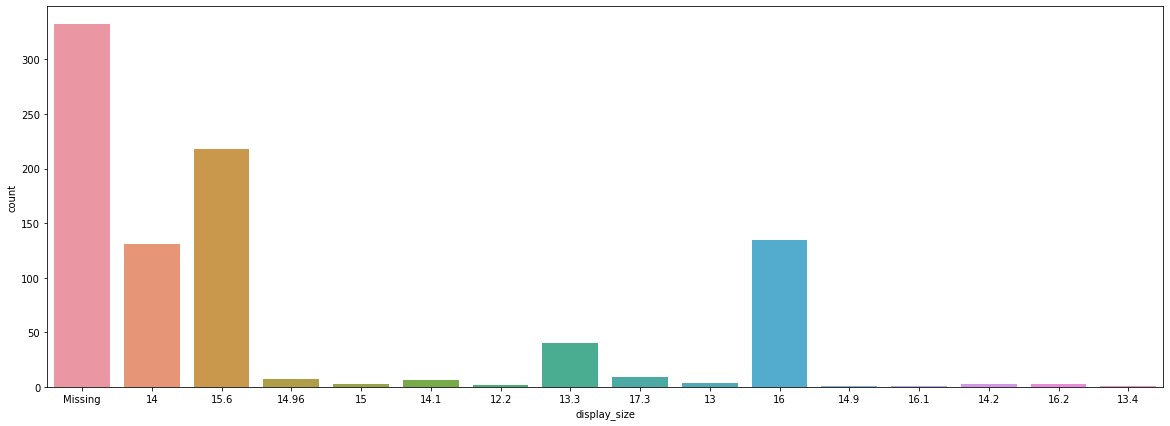

In [ ]:
plt.figure(figsize = (20,7))
sns.countplot(x = 'display_size' , data = df)

Menampilkan Processor yang diminati

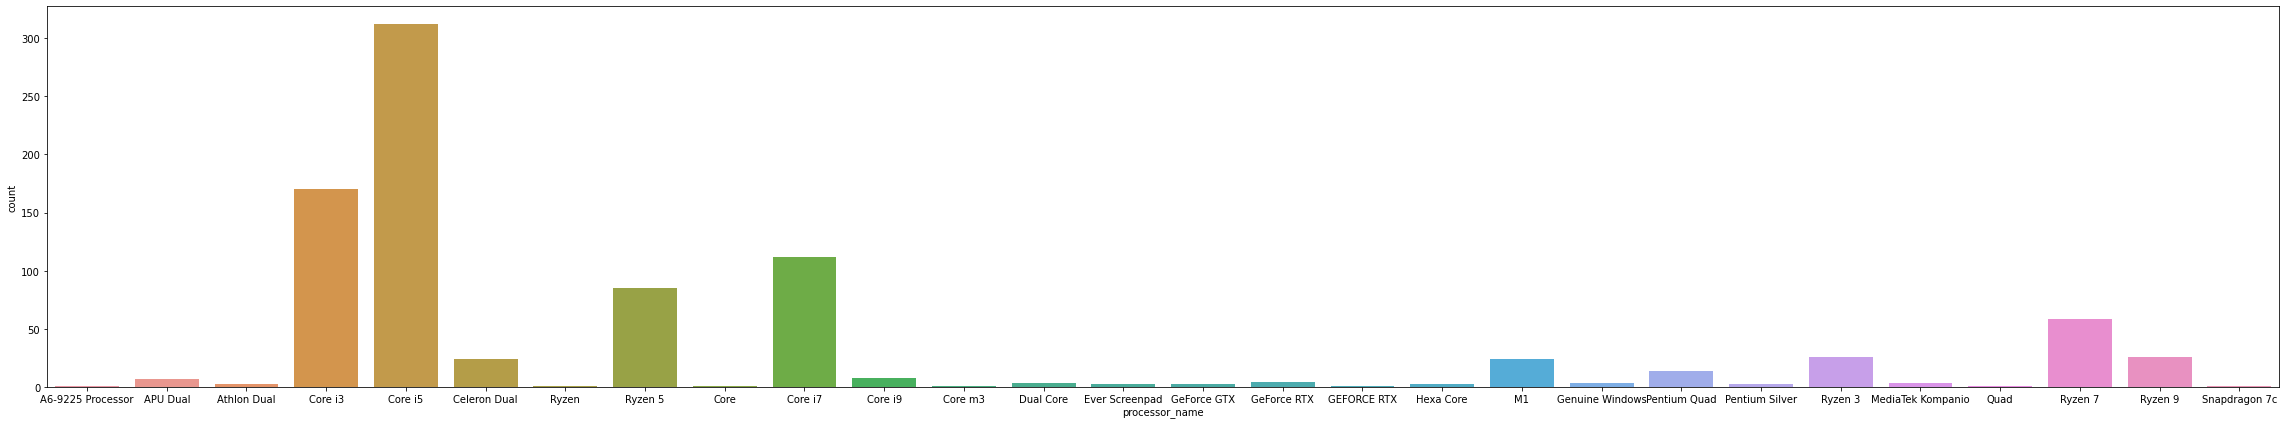

In [ ]:
plt.figure(figsize = (40,7))
sns.countplot(x = 'processor_name' , data = df)

In [ ]:
def myBarPlot(data,data2=None,title=None,x_pos=0.25,y_pos=10,val_per=None):
    '''
    data: data
    data2: hue data
    title: str- title of graph
    x_pos: int/float - to adjust x-axis position of text
    y_pos=10: int/float - to adjust y-axis position of text
    val_per: default: None- nothing print
            'value': to print actual value on top
            'percent': to print in percent
            'val_per': to print both value and percent
    
    '''
    
    total_data = data.shape[0] # total baris pada data
    
    ax = sns.countplot(data,data2)
    for i in ax.patches:
        height = i.get_height() # get height of bar (value of y axis)      
        a = height
        x = i.get_x() # get x_axis value
        b = 0
        if val_per == 'value':
            b = a
        elif val_per == "percent":
            b = '{:.2f}%'.format((a/total_data)*100)
        elif val_per == 'val_per':
            b = '{}\n{:.1f}%'.format(a,(a/total_data)*100)
        else:
            b = ''
 
    ax.text(x=x+x_pos,y=height+y_pos,s=b,rotation=None)
    plt.title(title,fontdict={'fontsize':20,'color':'red'})
    plt.xticks(rotation=90)

In [ ]:
def donut():
    data = df['processor_brand'].value_counts().values.tolist()
    labels = df['processor_brand'].value_counts().index.tolist()
    total = (df['model'].value_counts()/df['model'].value_counts().sum()*100).sum()
    # Membuat pieplot
    plt.pie(data, labels=labels,autopct='%.1f%%',pctdistance=0.85)
    # menambahkan lubang agar terlihat seperti donut chart
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)

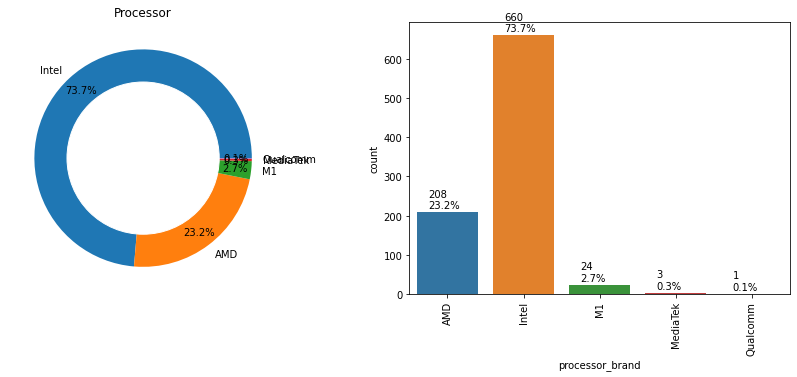

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
donut()
plt.title('Processor')
plt.subplot(122)
myBarPlot(df['processor_brand'],val_per='val_per',x_pos=0.15)

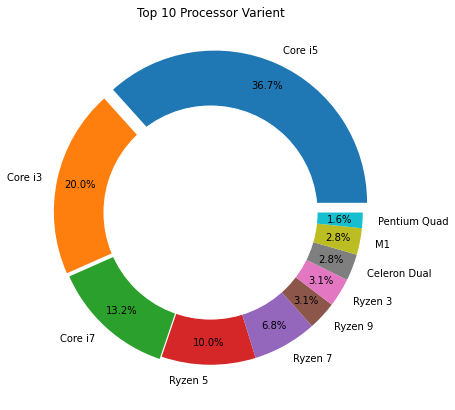

In [ ]:
# Menampilkan grafik Processor Varient
data = (df['processor_name'].value_counts()/df['processor_name'].value_counts().sum()*100).head(10).values.tolist()
labels = (df['processor_name'].value_counts()/df['processor_name'].value_counts().sum()*100).head(10).index.tolist()
total = (df['processor_name'].value_counts()/df['processor_name'].value_counts().sum()*100).sum()
explode = (0.07,0.03 , 0.02, 0, 0, 0, 0, 0, 0, 0)
plt.figure(figsize=(7,7))
# Membuat pieplot
plt.pie(data, labels=labels,autopct=lambda x: '{:.1f}%'.format((x*total)/100),pctdistance=0.85,explode=explode)
# menambahkan lubang agar terlihat seperti donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Top 10 Processor Varient')
plt.show()

In [ ]:
fig = px.pie(values=data, names=labels, title='Top 10 Processor Varient',hole=0.5,height=400,width=400)
fig.show()

Menampilkan Kapasitas RAM yang diminati

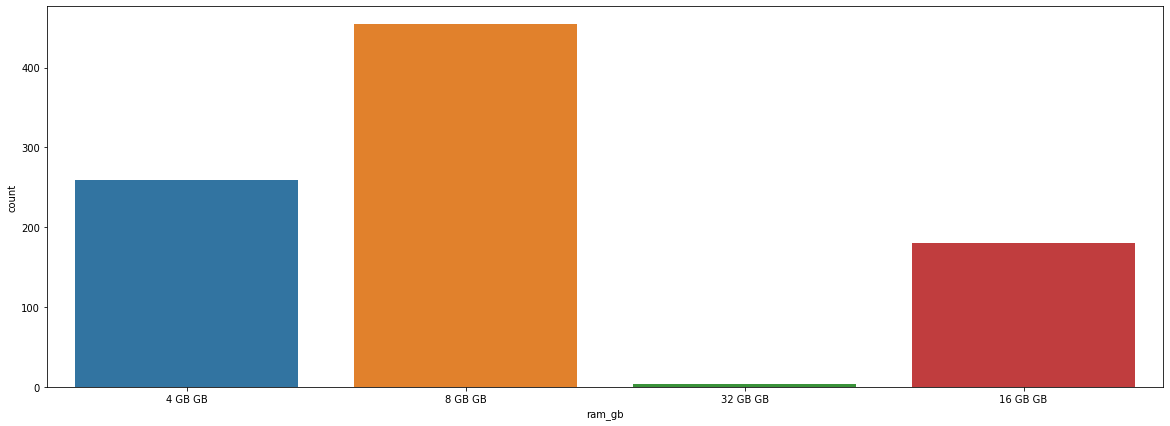

In [ ]:
plt.figure(figsize = (20,7))
sns.countplot(x = 'ram_gb' , data = df)

In [ ]:
fig = px.sunburst(df, path=['ram_gb', 'ram_type'], color='ram_gb',title='RAM capacity and Its type ')
fig.show()

Menampilkan OS yang diminati

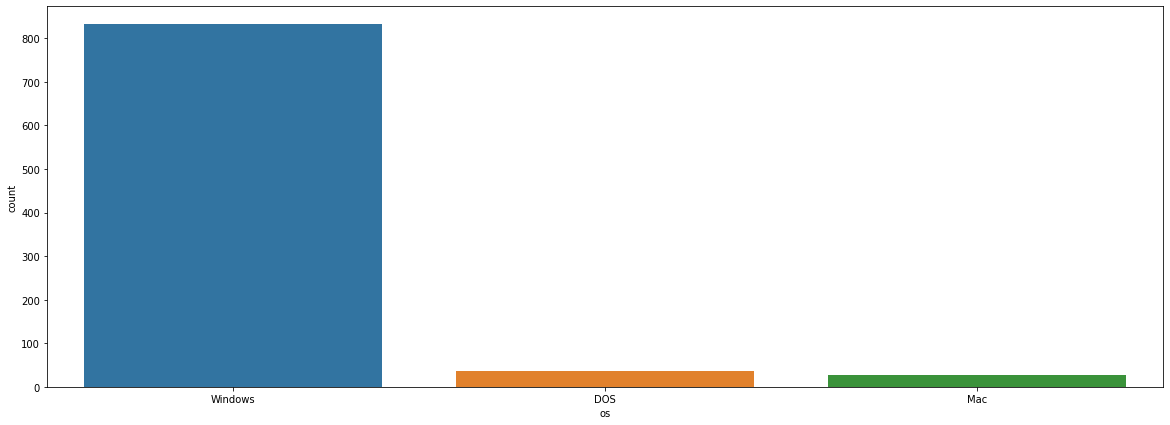

In [ ]:
plt.figure(figsize = (20,7))
sns.countplot(x = 'os' , data = df)

In [ ]:
fig = px.sunburst(df, path=['os', 'os_bit'], color='os',title='Operating Sytem and Its type ')
fig.show()

Menampilkan komparasi Harga awal dan Harga akhir

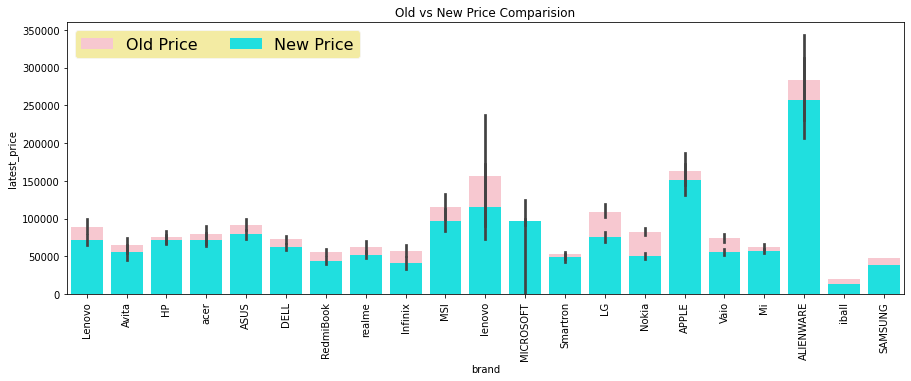

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(y=df['old_price'],x=df['brand'],color='pink',label='Old Price')
sns.barplot(y=df['latest_price'],x=df['brand'],color='cyan',label='New Price')
plt.xticks(rotation=90)
plt.title('Old vs New Price Comparision')
plt.legend( ncol=2, facecolor='khaki', edgecolor='#f6f5f5', loc='upper left', fontsize=16)
plt.show()

Text(0.5, 1.0, 'Histogram of Old and New Price')

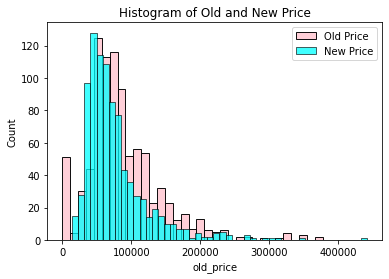

In [ ]:
sns.histplot(df['old_price'],color='pink',label='Old Price')
sns.histplot(df['latest_price'],label='New Price',color='cyan')
plt.legend()
plt.title('Histogram of Old and New Price')

# **Modeling**

Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
# Memisahkan kolom kategori dan numerik
cat = []
num = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

In [ ]:
df[cat]

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,weight,display_size,Touchscreen,msoffice
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,DDR4,0 GB,1024 GB,Windows,64-bit,ThinNlight,Missing,No,No
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,DDR4,0 GB,512 GB,Windows,64-bit,Casual,Missing,No,No
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,64-bit,ThinNlight,Missing,No,No
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,128 GB,0 GB,Windows,64-bit,ThinNlight,Missing,No,No
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,DDR4,256 GB,0 GB,Windows,64-bit,ThinNlight,Missing,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,ASUS,ROG,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,64-bit,Casual,16,No,No
892,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,64-bit,Casual,Missing,No,No
893,ASUS,Ryzen,AMD,Ryzen 9,Missing,4 GB GB,DDR4,1024 GB,0 GB,Windows,64-bit,Casual,16,No,No
894,SAMSUNG,Galaxy,Qualcomm,Snapdragon 7c,Missing,4 GB GB,LPDDR4X,0 GB,512 GB,Windows,32-bit,Casual,Missing,No,No


In [ ]:
for i in cat:
    df[i] = le.fit_transform(df[i])
df.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,display_size,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,8,11,0,0,0,2,1,0,1,2,...,15,0,0,0,24990,32790,23,3.7,63,12
1,8,59,0,1,0,2,1,0,3,2,...,15,0,0,0,19590,21325,8,3.6,1894,256
2,3,75,0,1,0,2,1,2,0,2,...,15,0,0,0,19990,27990,28,3.7,1153,159
3,3,75,0,1,0,2,1,2,0,2,...,15,0,0,0,21490,27990,23,3.7,1153,159
4,3,75,0,1,0,2,1,4,0,2,...,15,0,0,0,24990,33490,25,3.7,1657,234


In [ ]:
x = df.drop('latest_price', 1)
y = df.latest_price

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=42)

# **Evaluasi**

Mechine Learning Algorithms

In [ ]:
# install lazypredict from shankarpandala github
! pip install git+https://github.com/shankarpandala/lazypredict.git

  Cloning https://github.com/shankarpandala/lazypredict.git to /tmp/pip-req-build-w1zhnpdx
  Running command git clone -q https://github.com/shankarpandala/lazypredict.git /tmp/pip-req-build-w1zhnpdx
     |████████████████████████████████| 302 kB 5.1 MB/s 
     |████████████████████████████████| 1.2 MB 8.1 MB/s 
     |████████████████████████████████| 14.5 MB 29.1 MB/s 
     |████████████████████████████████| 10.1 MB 25.7 MB/s 
     |████████████████████████████████| 248 kB 67.4 MB/s 
     |████████████████████████████████| 636 kB 64.9 MB/s 
     |████████████████████████████████| 6.8 MB 23.3 MB/s 
     |████████████████████████████████| 25.9 MB 1.4 MB/s 
     |████████████████████████████████| 72 kB 876 kB/s 
     |████████████████████████████████| 127.6 MB 27 kB/s 
  Created wheel for lazypredict: filename=lazypredict-0.2.9-py2.py3-none-any.whl size=12333 sha256=04bc92806a509aeff4dae37f722b74681e07f40d2dd817cc86fa3ef7e07e2188
  Stored in directory: /tmp/pip-ephem-wheel-cache-u3h3thme

In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.24

Found existing installation: scikit-learn 0.23.1
Uninstalling scikit-learn-0.23.1:
  Successfully uninstalled scikit-learn-0.23.1
     |████████████████████████████████| 22.3 MB 47.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.0 which is incompatible.
lazypredict 0.2.9 requires scikit-learn==0.23.1, but you have scikit-learn 0.24.0 which is incompatible.


In [ ]:
from lazypredict.Supervised import LazyRegressor

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None, predictions=True)

In [ ]:
models, predictions = reg.fit(xtrain, xtest, ytrain, ytest)

100%|██████████| 40/40 [00:04<00:00,  8.75it/s]


In [ ]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.94,0.95,10777.72,0.41
RandomForestRegressor,0.93,0.94,11816.50,0.51
GradientBoostingRegressor,0.91,0.92,13071.72,0.21
LGBMRegressor,0.91,0.92,13238.76,0.09
BaggingRegressor,0.91,0.92,13292.62,0.07
XGBRegressor,0.90,0.91,14129.09,0.27
ExtraTreeRegressor,0.89,0.90,14728.15,0.02
LarsCV,0.86,0.87,16927.08,0.07
LassoLarsCV,0.86,0.87,16928.53,0.06
